<a href="https://colab.research.google.com/github/ttb-git/berkeley-engr-assignment1/blob/main/Who_will_accept_the_coupon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day



---



Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

# 1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('/content/drive/MyDrive/assignment_5_1_starter (4)/data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


First, I am going to transpose the columns to have a better look at the data.

In [7]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,12674,12675,12676,12677,12678,12679,12680,12681,12682,12683
destination,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,...,Home,Home,Home,Home,Home,Home,Work,Work,Work,Work
passanger,Alone,Friend(s),Friend(s),Friend(s),Friend(s),Friend(s),Friend(s),Kid(s),Kid(s),Kid(s),...,Alone,Alone,Alone,Partner,Partner,Partner,Alone,Alone,Alone,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Rainy,Snowy,Sunny,Sunny,Sunny,Rainy,Rainy,Snowy,Snowy,Sunny
temperature,55,80,80,80,80,80,55,80,80,80,...,55,30,80,30,30,55,55,30,30,80
time,2PM,10AM,10AM,2PM,2PM,6PM,2PM,10AM,10AM,10AM,...,10PM,10PM,6PM,6PM,10PM,6PM,7AM,7AM,7AM,7AM
coupon,Restaurant(<20),Coffee House,Carry out & Take away,Coffee House,Coffee House,Restaurant(<20),Carry out & Take away,Restaurant(<20),Carry out & Take away,Bar,...,Coffee House,Coffee House,Restaurant(20-50),Restaurant(<20),Restaurant(<20),Carry out & Take away,Carry out & Take away,Coffee House,Bar,Restaurant(20-50)
expiration,1d,2h,2h,2h,1d,2h,1d,2h,2h,1d,...,2h,2h,1d,1d,2h,1d,1d,1d,1d,2h
gender,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
age,21,21,21,21,21,21,21,21,21,21,...,26,26,26,26,26,26,26,26,26,26
maritalStatus,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,...,Single,Single,Single,Single,Single,Single,Single,Single,Single,Single


# 2. Investigate the dataset for missing or problematic data.


These are the five steps to ensuring missing data are correctly identified and appropriately dealt with:

1. Identify missing values within each variable.
2. Look for patterns of missingness.
3. Check for associations between missing and observed data.
4. Decide how to handle missing data.

In [8]:
# Let's have a look at the datatypes first, and then some more exploring.
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [9]:
#Let's analyse the cardinality of categorical columns to get a better understanding.
for col in data.columns:
    print("{} column has {} unique values".format(col,data[col].nunique()))

destination column has 3 unique values
passanger column has 4 unique values
weather column has 3 unique values
temperature column has 3 unique values
time column has 5 unique values
coupon column has 5 unique values
expiration column has 2 unique values
gender column has 2 unique values
age column has 8 unique values
maritalStatus column has 5 unique values
has_children column has 2 unique values
education column has 6 unique values
occupation column has 25 unique values
income column has 9 unique values
car column has 5 unique values
Bar column has 5 unique values
CoffeeHouse column has 5 unique values
CarryAway column has 5 unique values
RestaurantLessThan20 column has 5 unique values
Restaurant20To50 column has 5 unique values
toCoupon_GEQ5min column has 1 unique values
toCoupon_GEQ15min column has 2 unique values
toCoupon_GEQ25min column has 2 unique values
direction_same column has 2 unique values
direction_opp column has 2 unique values
Y column has 2 unique values


In [10]:
#Code snippet to finds the columns with highest cardinality for each datatype.
max_int = -1
max_obj = -1
int_mc = None
obj_mc = None
for col in data.columns:
    if data[col].dtypes=='int64':
        if data[col].nunique()>max_int:
            int_mc = col
            max_int = data[col].nunique()
    if data[col].dtypes==object:
        if data[col].nunique()>max_obj:
            obj_mc = col
            max_obj = data[col].nunique()

print("Integer-Column {} has highest cardinalty of {}".format(int_mc,max_int))
print('Cat-column {} has highest cardinality of {}'.format(obj_mc,max_obj))

Integer-Column temperature has highest cardinalty of 3
Cat-column occupation has highest cardinality of 25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null


From above, we can see that even columns like temperature and age have a few unique values.  We can convert these columns to categorical for better data analysis.

In [12]:
#change temperature into a category as its an ordinal datatype
data['temperature']=data['temperature'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  object  
 1   passanger             12684 non-null  object  
 2   weather               12684 non-null  object  
 3   temperature           12684 non-null  category
 4   time                  12684 non-null  object  
 5   coupon                12684 non-null  object  
 6   expiration            12684 non-null  object  
 7   gender                12684 non-null  object  
 8   age                   12684 non-null  object  
 9   maritalStatus         12684 non-null  object  
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  object  
 12  occupation            12684 non-null  object  
 13  income                12684 non-null  object  
 14  car                   108 non-null    object  
 15  Ba

In [15]:
#Next, let's dig deeper into the null values in our dataset
data.isnull().values.any()

True

Most of the columns in data have a few missing values hence they can be imputed, car has only 108 non-null instances, so we will create another category 'missing' for NAN. We will soon drop it if it isn't useful. Now, what is the percentage of missing values in each attribute?

In [16]:
data.isnull().sum().sort_values(ascending=False) * 100 /len(data)

car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
destination              0.000000
passanger                0.000000
direction_opp            0.000000
direction_same           0.000000
toCoupon_GEQ25min        0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ5min         0.000000
income                   0.000000
occupation               0.000000
education                0.000000
has_children             0.000000
maritalStatus            0.000000
age                      0.000000
gender                   0.000000
expiration               0.000000
coupon                   0.000000
time                     0.000000
temperature              0.000000
weather                  0.000000
Y                        0.000000
dtype: float64

Reference:
https://en.wikipedia.org/wiki/Skewness
https://www.geeksforgeeks.org/python-pandas-dataframe-skew/

"For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat."

In [17]:
#I am going to use the .skew() function to look at the what side the tail of the data
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


has_children         0.348644
toCoupon_GEQ5min     0.000000
toCoupon_GEQ15min   -0.247890
toCoupon_GEQ25min    2.351805
direction_same       1.389366
direction_opp       -1.389366
Y                   -0.276364
dtype: float64

# 3. Decide what to do about your missing data -- drop, replace, other...

More than 99% values are missing in car attribute, whereas others have around ~1% missing values only

I will see what unique values are there in each attribute and do they make sense.

In [18]:
for col in data.columns:
    print(col,"====>",data[col].unique())

destination ====> ['No Urgent Place' 'Home' 'Work']
passanger ====> ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ====> ['Sunny' 'Rainy' 'Snowy']
temperature ====> [55, 80, 30]
Categories (3, int64): [30, 55, 80]
time ====> ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ====> ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ====> ['1d' '2h']
gender ====> ['Female' 'Male']
age ====> ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ====> ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children ====> [1 0]
education ====> ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ====> ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media'

In [19]:
#First, I am going to look deeper at the 'car' column
data["car"].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

As we see from the above that there are missing values in several columns, and the 'car' variable has only 108 non-null values, more than 99% of the values are NaN. We can just drop this column. These variables are insufficient so it is best to remove it completely from the data to avoid inaccuracies in our modeling.

In [20]:
data.drop('car', inplace=True, axis=1)


Empty values in categorical data can be removed or replaced with the most frequent value in each column.

Lets iterate through the pandas table and get all the columns with empty or NaN values, and then for each column the code is going to find the largest variable count and fill the empty values with the corresponding variable with maximum count.

In [21]:
for x in data.columns[data.isna().any()]:
    data = data.fillna({x: data[x].value_counts().idxmax()})

Transform the 'object' to 'category' next.

In [23]:
#change Object datatypes to Categorical datatypes)

data_obj = data.select_dtypes(include=['object']).copy()

for col in data_obj.columns:
    data[col]=data[col].astype('category')
    
data.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children               int64
education               category
occupation              category
income                  category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min           int64
toCoupon_GEQ15min          int64
toCoupon_GEQ25min          int64
direction_same             int64
direction_opp              int64
Y                          int64
dtype: object

In [24]:
#lets do some statistcal analysis
data.describe(include='all')

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.0,12684,12684,12684,12684,12684,12684,...,12684,12684,12684,12684,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,3.0,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,6528.0,3230,3996,7091,6511,2653,5100,...,3602,4823,5506,6266,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [25]:
data.select_dtypes('int64').nunique()

has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
dtype: int64

From the decription above we can tell that 'toCoupon_GEQ5min' has only one unique variable which won't help much in our analysis and also the encoding of the categorical variables. Therefore, its better to drop that column.

In [26]:
data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [27]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# 4. What proportion of the total observations chose to accept the coupon? 



In [28]:
data['Y'].value_counts()/len(data)

1    0.568433
0    0.431567
Name: Y, dtype: float64

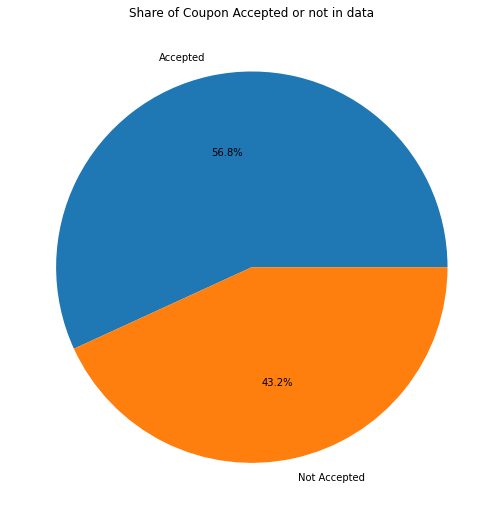

In [38]:
# Let's make a pie plot showing share of coupon accepted or not
plt.figure(figsize=(15,9))
plt.pie(data.Y.value_counts(normalize = True),labels=['Accepted','Not Accepted'], autopct='%.1f%%')
plt.title("Share of Coupon Accepted or not in data")
plt.show()

# 5. Use a bar plot to visualize the `coupon` column.

<BarContainer object of 5 artists>

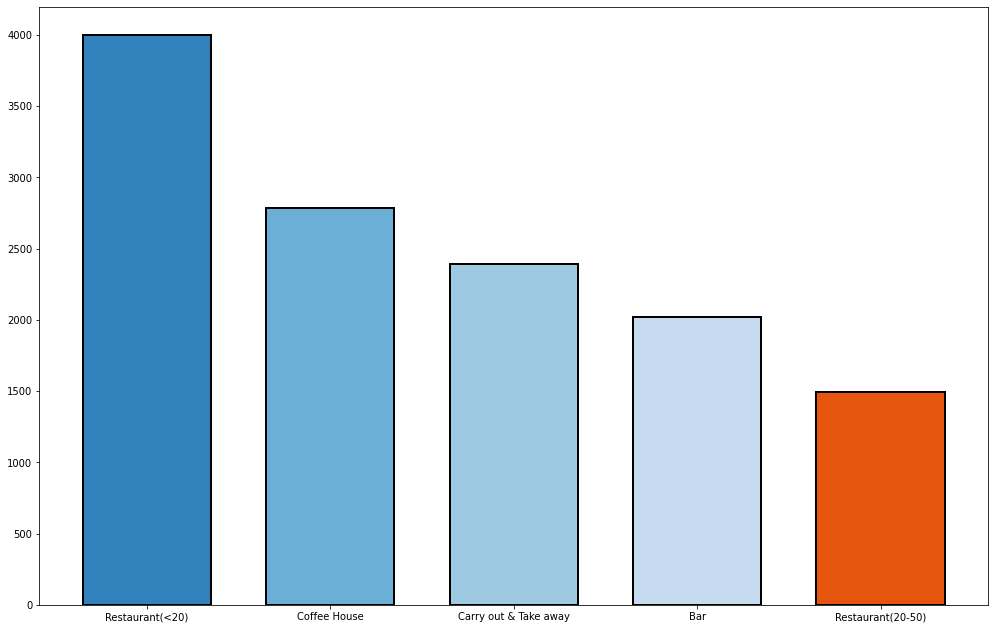

In [39]:
#Visualizing the data

plt.figure(figsize=[17, 11])
col_map = plt.get_cmap('tab20c')

plt.bar(data['coupon'].unique(), data['coupon'].value_counts(), width=0.7, color=col_map.colors, edgecolor='k', linewidth=2)

# 6. Use a histogram to visualize the temperature column.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



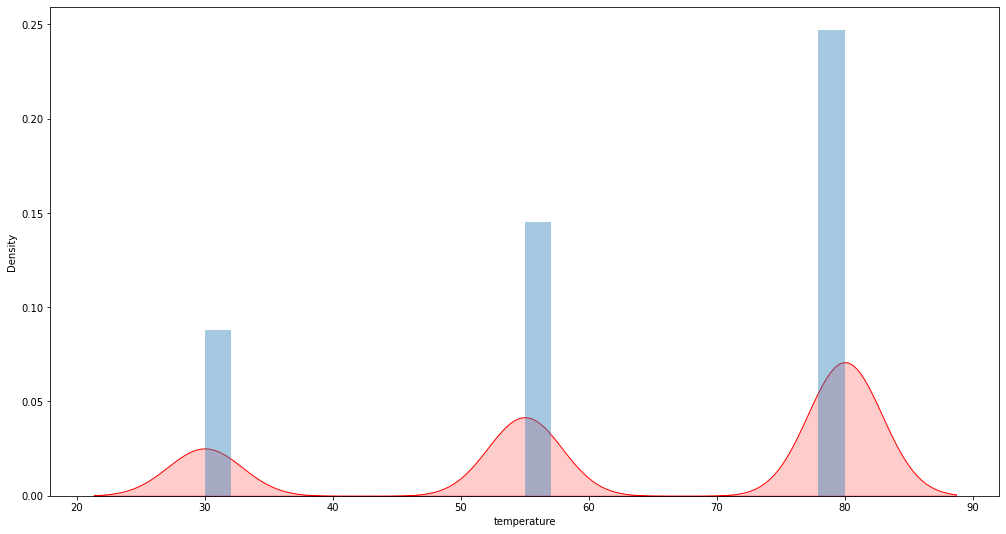

In [37]:
#Plot the histogram thanks to the distplot function
plt.figure(figsize=(17,9))
sns.distplot(a=data["temperature"], hist=True, kde=True, rug=False, kde_kws={"color": "r", "alpha": 0.2, "linewidth": 1, "shade": True})

From the above plot as values are mostly uniformly distributed for each class. however some obervations:

* More Coupon acceptance rate for respondents in regions with high temperature
* There is more acceptance of coupons where coupon expires in a day as compared to coupons which expire early in 2hrs. Reason is common-sensical that people have more time.
* Coupon is mostly accepted throughout all age and income groups. Moreover for both cheap and expensive restaurants irrespective of how many times an individual generally goes to these restaurants per month, he/she is more likely to accept the coupon.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
df_bar = data[data['coupon'] == 'Bar']
df_bar.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,never,4~8,1~3,1~3,never,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,never,4~8,1~3,1~3,never,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,never,4~8,1~3,1~3,never,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,less1,1~3,1~3,1~3,less1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


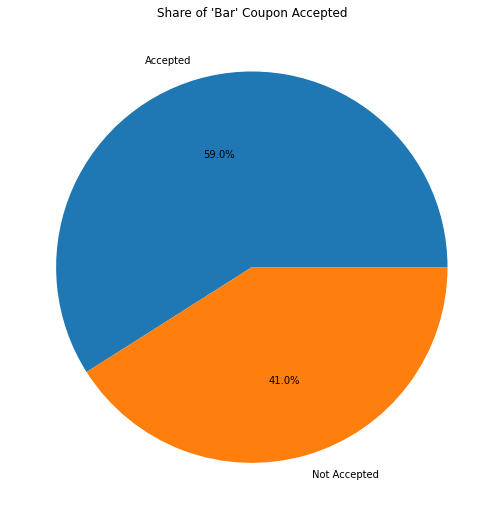

In [69]:
plt.figure(figsize=(15,9))
plt.pie(df_bar.Y.value_counts(normalize = True),labels=['Accepted','Not Accepted'], autopct='%.1f%%')
plt.title("Share of 'Bar' Coupon Accepted")
plt.show()

From the pie chart above, we can see that 59% the bar coupon.

# **3**. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
#Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8



# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



# 7.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

# Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  